NAME: Sumedha Zaware
    
ROLL NO.: TECOC342

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
cols = ['deck','class']
data[cols] = data[cols].astype('object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
print("The shape of the dataset is ",data.shape)

The shape of the dataset is  (891, 15)


In [9]:
# Checking Null values
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Here, we can see that there are

a. 177 missing values in age 

b. 688 missing values in deck

c. 2 values missing in embark_town

d. 2 values missing in embarked

Hence, these values must be replaced by mean or median(in case of numeric variables) and by mode(in case of categorical variables)

**Age**

In [10]:
# For Age
avg_age = data["age"].astype("float").mean(axis = 0)
data["age"].replace(np.nan, avg_age, inplace = True)

**Deck**

In [13]:
data['deck'].replace(np.nan, 'C', inplace=True)

**Embark_town**

In [15]:
# For embark_town
data["embark_town"].replace(np.nan, data['embark_town'].value_counts().idxmax(), inplace=True)

**Embarked**

In [17]:
# For embarked
data["embarked"].replace(np.nan, data['embarked'].value_counts().idxmax(), inplace=True)

In [18]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

There are no null values. 

### VISUALIZATION

[Text(0.5, 1.0, 'no. survived')]

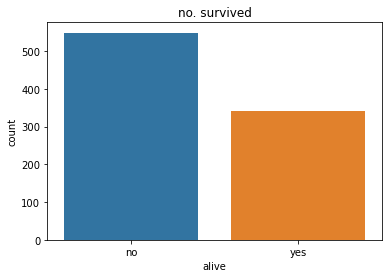

In [19]:
# Count of how many people survived and how many didn't survive
sns.countplot(data = data, x="alive").set(title="no. survived")

[Text(0.5, 1.0, 'no. survived')]


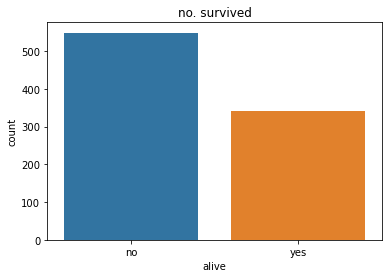

In [21]:
ax = sns.countplot(data=data, x="alive").set(title="no. survived")
print(ax)

[Text(0.5, 1.0, 'no. survived grouped by sex')]

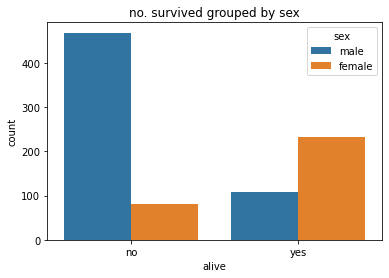

In [22]:
#Count of how many males and females survived/died
sns.countplot(data=data, x="alive", hue="sex").set(title="no. survived grouped by sex")

[Text(0.5, 1.0, 'Distribution by age groups')]

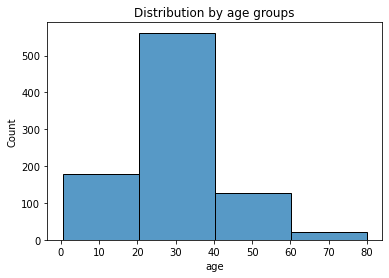

In [23]:
sns.histplot(data = data, x="age", bins=4).set(title="Distribution by age groups")

[Text(0.5, 1.0, 'Survived men and women from each ticket class')]

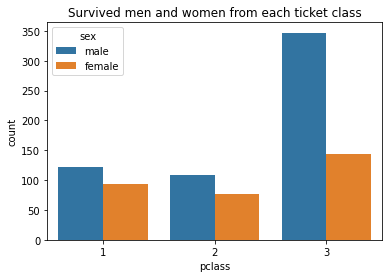

In [24]:
sns.countplot(data = data, x="pclass", hue="sex").set(title="Survived men and women from each ticket class")

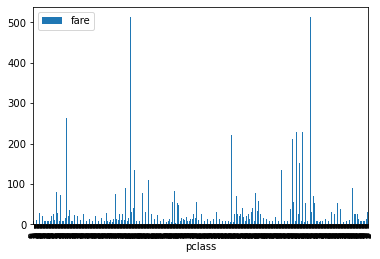

In [152]:
data.plot(x="pclass", y="fare", kind="bar")

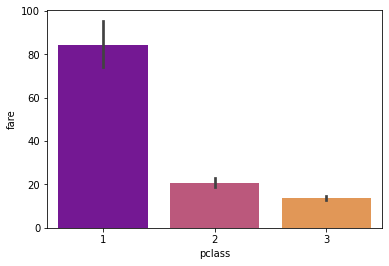

In [156]:
import seaborn as sns
sns.barplot(x ='pclass', y ='fare', data = data, palette ='plasma')